#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Walmart DataSet.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Probelm Statement:-Company Suffuring from Financial Crisis

Project Objective:- Solve Problems related to Demand and Supply

Data Description:

Store         - ID of each store

Date          - Weeek of sales

Weekly_sales  - Sales for the given store in that week

Holiday_flag  - if it is holiday week

Temperature   - Temperature on the day of the sale

Fuel_Price    - Cost of the fuel in the region

CPI           - Consumer Price Index

Unemployment  - Unemployment Rate in the region






In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.shape

(6435, 8)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [6]:
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-6-182e23b44254>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Weekly_Sales'].corr(df['Unemployment'])

-0.10617608965795429

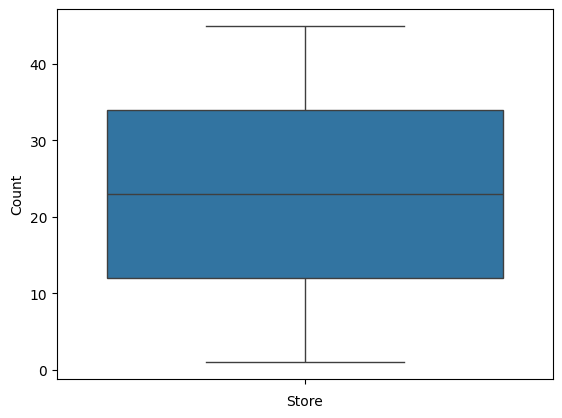

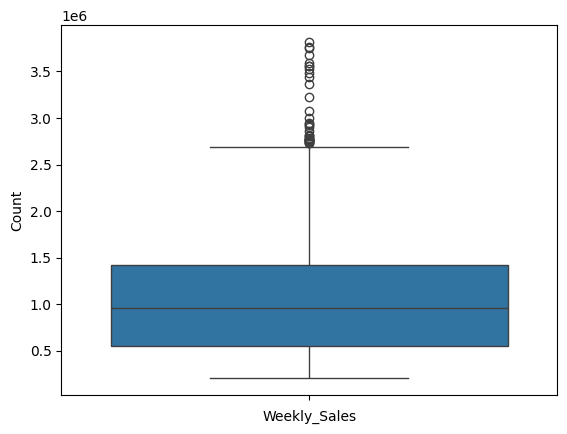

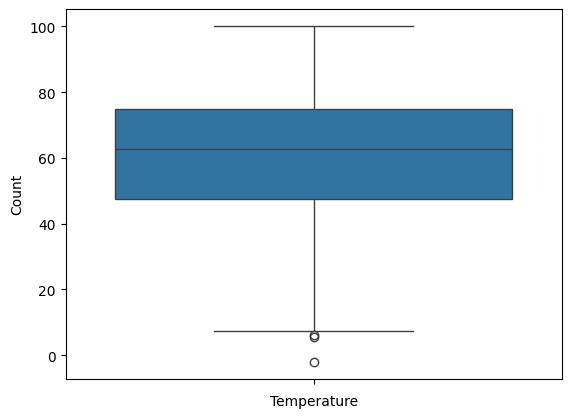

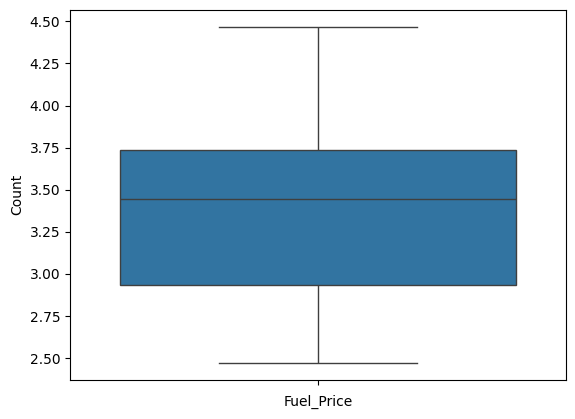

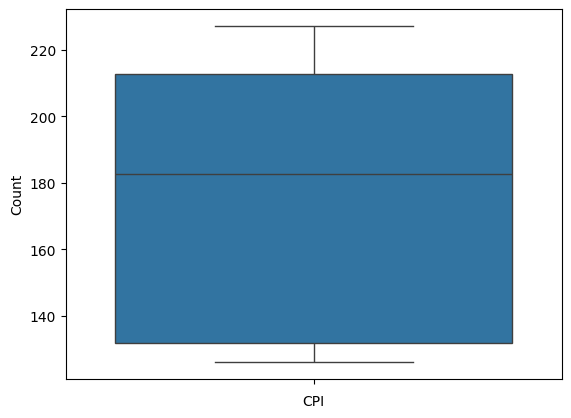

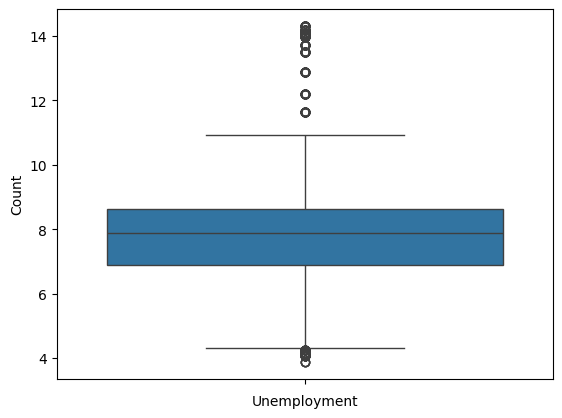

In [10]:
# Outliers Detection
col_list=[]
for col in df.columns:
  col_list.append(col)
  if (df[col].dtypes!='datetime64[ns]') and (col!='Holiday_Flag'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

From the above boxplot we can say that there are outliers present in the Weekly_sales, Temperature & Unemploymentrate columns.

In [11]:
# Removing Outliers

col=df[['Weekly_Sales','Temperature','Unemployment']]
for i in col:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  Threshold=1.5 * IQR
  df=df[(df[i]>= Q1-Threshold) & (df[i] <= Q3+ Threshold)]

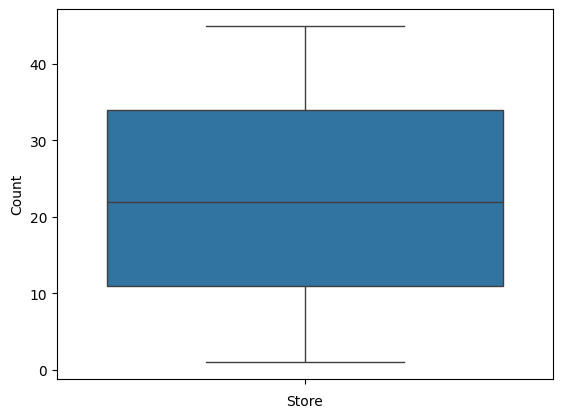

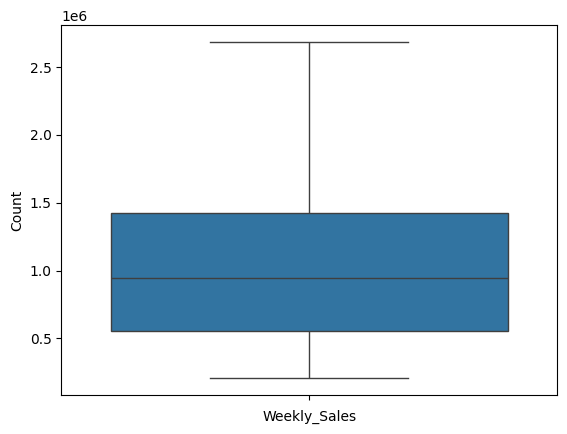

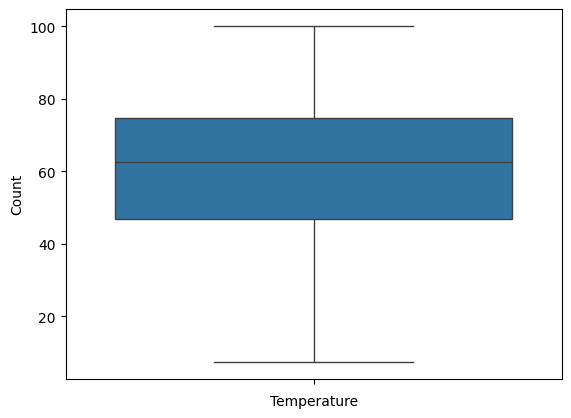

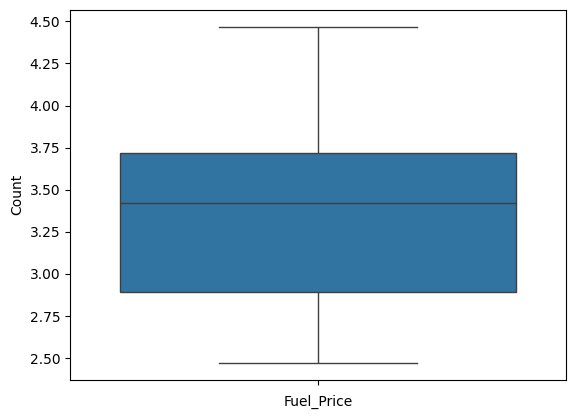

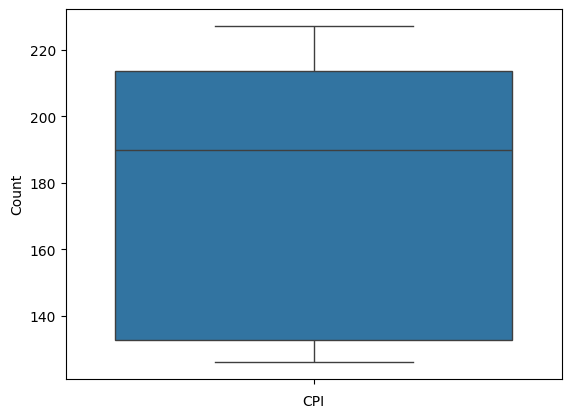

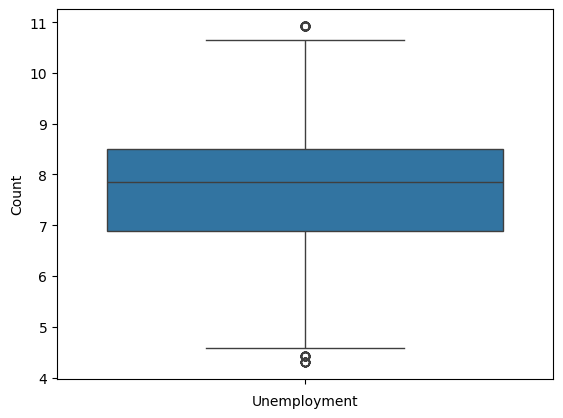

In [12]:
#Verifyling Outliers if any Present
col_list=[]
for col in df.columns:
  col_list.append(col)
  if (df[col].dtypes!='datetime64[ns]') and (col!='Holiday_Flag'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [13]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [14]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.week

<ipython-input-14-5cc6fc65e2b1>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week']=df['Date'].dt.week


In [15]:
df.shape   #518 outliers removed is it valid to remove this much of outliers

(5917, 11)

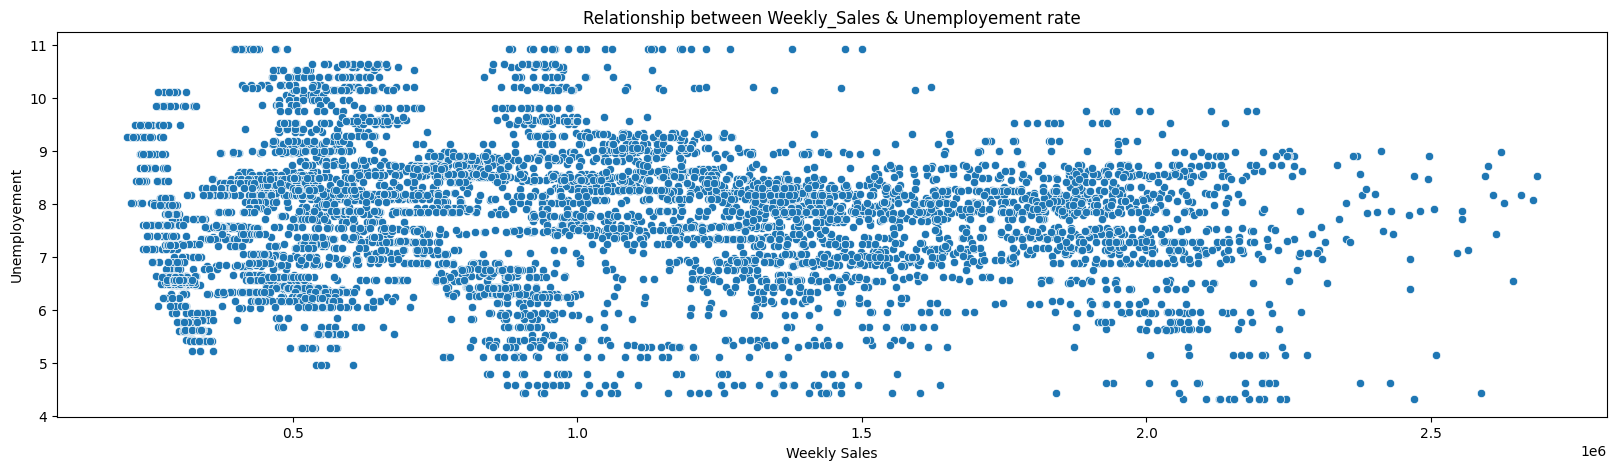

In [16]:
# Checking relationship between Weekly_Sales & Unemployement rate using scatter plot
plt.figure(figsize=(20,5))
sns.scatterplot(x='Weekly_Sales',y='Unemployment',data=df)
plt.title('Relationship between Weekly_Sales & Unemployement rate')
plt.xlabel('Weekly Sales')
plt.ylabel('Unemployement')
plt.show()

In [17]:
df['Weekly_Sales'].corr(df['Unemployment'])

-0.07309164834106423


As the correcation value between both the varibles is -0.07309164834106423,So we can say that there is no correlation between Weekly_Sales & Unemployement .

In [18]:
# Grouping Weely_Sales data to get most suffering store
Store_data_corr=df.groupby('Store')['Weekly_Sales','Unemployment'].corr().unstack()
Store_With_Highest_Negative_correlation=Store_data_corr['Weekly_Sales']['Unemployment'].idxmin()
Store_With_Highest_Negative_correlation

<ipython-input-18-ac01e3acc7c0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Store_data_corr=df.groupby('Store')['Weekly_Sales','Unemployment'].corr().unstack()


44

<ipython-input-19-e5886b3c2714>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'])


Text(0.5, 0, 'Weekly Sales')

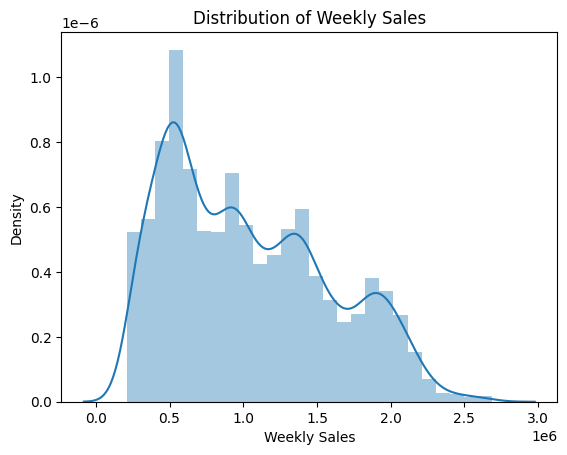

In [19]:
#b. If the weekly sales show a seasonal trend, when and what could be the reason?

sns.distplot(df['Weekly_Sales'])
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')

From the above distribution plot we can conclude that the the data is positively skewed.

<ipython-input-20-e102d0b33829>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues')


<Axes: >

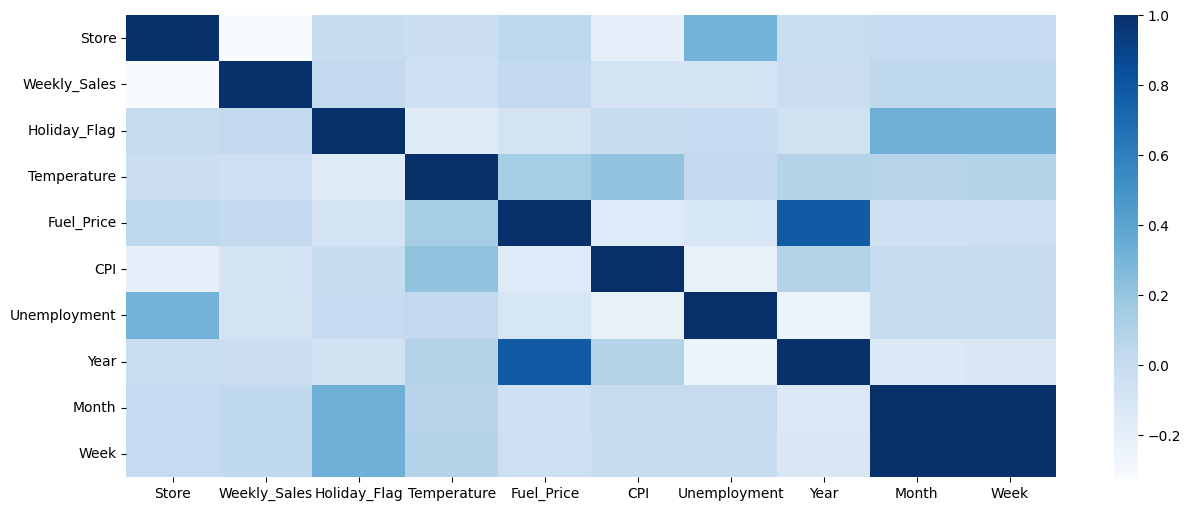

In [20]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='Blues')


<Axes: xlabel='Date'>

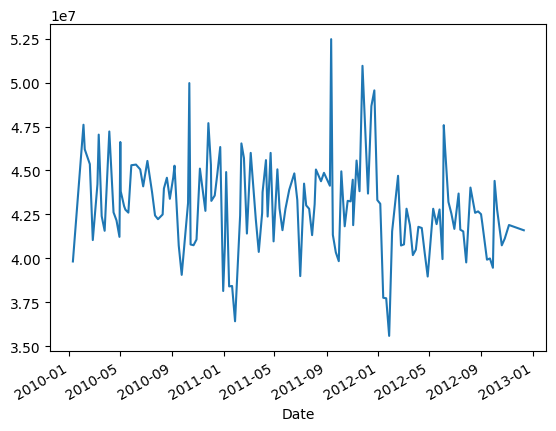

In [21]:
df.groupby('Date')['Weekly_Sales'].sum().plot()

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

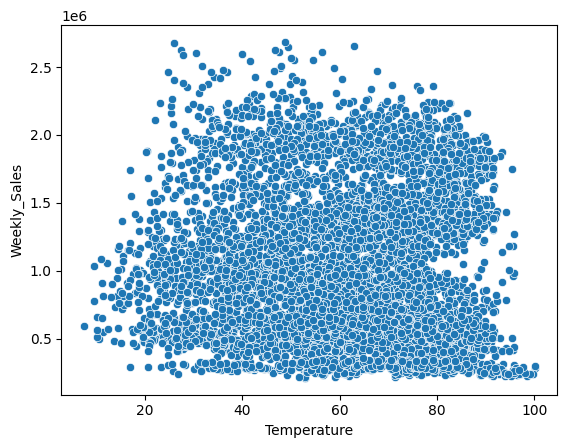

In [22]:
#c. Does temperature affect the weekly sales in any manner?

sns.scatterplot(x=df['Temperature'],y=df['Weekly_Sales'])

From the Above Scatter Plot we can say that temperature has no relation with weekly sales.

In [23]:
#How is the Consumer Price index affecting the weekly sales of various stores?

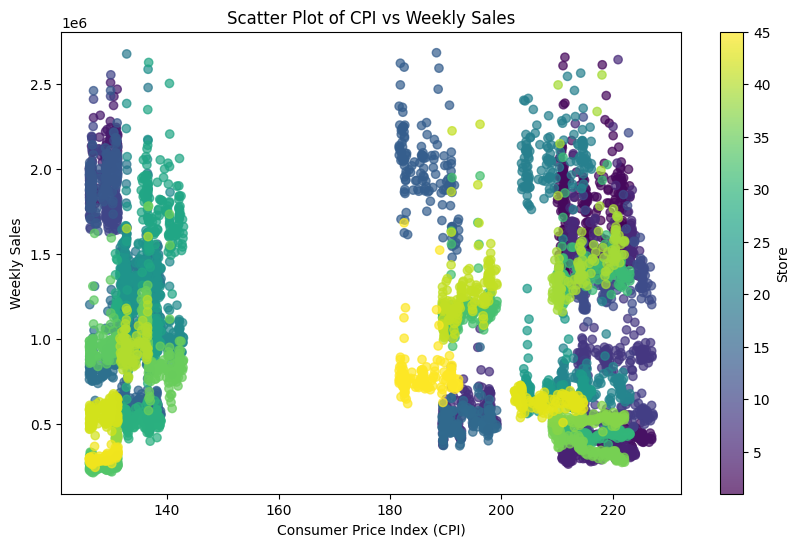

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CPI'], df['Weekly_Sales'], c=df['Store'], cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.colorbar(label='Store')
plt.show()

In [25]:
#The worst performing store, and how significant is the difference between the highest and lowest performing stores
store_performance=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

In [26]:
#Top store performance according to historical data
Top_store_performance=store_performance
Top_store_performance

Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
27    2.480387e+08
4     2.446487e+08
1     2.224028e+08
6     2.210286e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
24    1.940160e+08
11    1.939628e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
26    1.425989e+08
34    1.382498e+08
23    1.372484e+08
35    1.315207e+08
8     1.299512e+08
17    1.266991e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
40    9.669790e+07
43    9.056544e+07
15    8.913368e+07
7     8.104025e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
28    2.110677e+07
12    1.638671e+07
38    7.347379e+06
Name: Weekly_Sales, dtype: float64

In [27]:
#Top 5 Worst Performing Stores
worst_performing_store=store_performance.sort_values(ascending=True).head()
worst_performing_store

Store
38     7347378.89
12    16386710.79
28    21106767.80
33    37160221.96
44    43293087.84
Name: Weekly_Sales, dtype: float64

In [28]:
#Top 5 high Performing Stores
highest_performing_store=store_performance.head()
highest_performing_store

Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
Name: Weekly_Sales, dtype: float64

In [29]:
x=df.drop(['Weekly_Sales','Date'],axis=1)
y=df['Weekly_Sales']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [31]:
!pip install scikit-learn

#importing libraries for fitting model

R2 : 0.11990747413893954
MSE : 259808981246.19025
RMSE : 509714.6076445036


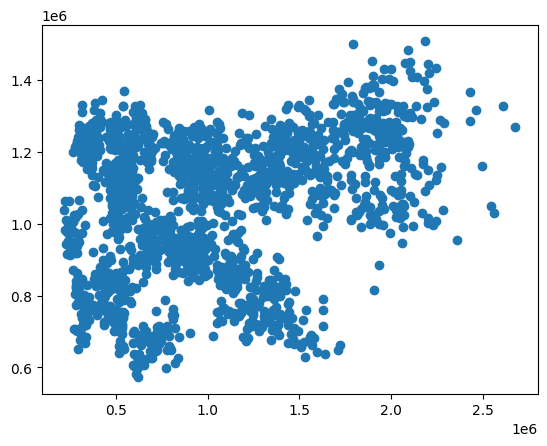

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import *

# Linear Regression
Lr=LinearRegression()
Lr.fit(x_train,y_train)
y_pred1=Lr.predict(x_test)

plt.scatter(y_test,y_pred1)

print('R2 :',r2_score(y_test,y_pred1))
print('MSE :',mean_squared_error(y_test,y_pred1))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 : 0.9234589033566162
MSE : 22595424637.798977
RMSE : 150317.74558514034


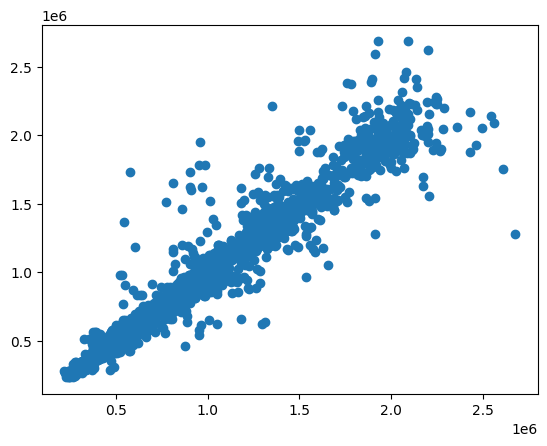

In [33]:
#Decision Tree

Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
y_pred2=Dt.predict(x_test)

plt.scatter(y_test,y_pred2)
print('R2 :',r2_score(y_test,y_pred2))
print('MSE :',mean_squared_error(y_test,y_pred2))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred2)))

R2 : 0.9589525134640953
MSE : 12117482362.637066
RMSE : 110079.43660210597


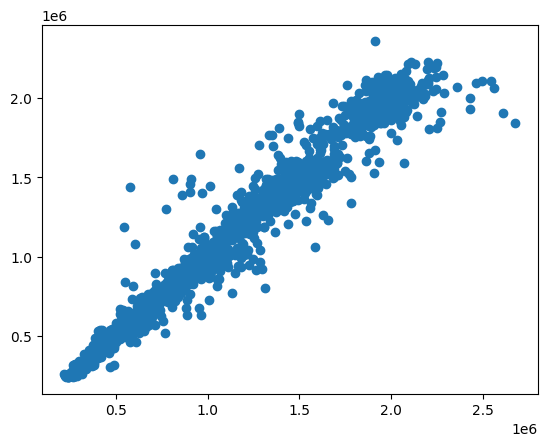

In [34]:
#Random Forest

Rf=RandomForestRegressor()
Rf.fit(x_train,y_train)
y_pred3=Rf.predict(x_test)

plt.scatter(y_test,y_pred3)
print('R2 :',r2_score(y_test,y_pred3))
print('MSE :',mean_squared_error(y_test,y_pred3))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred3)))

R2 : 0.37022345551202407
MSE : 185914091562.22952
RMSE : 431177.5638437482


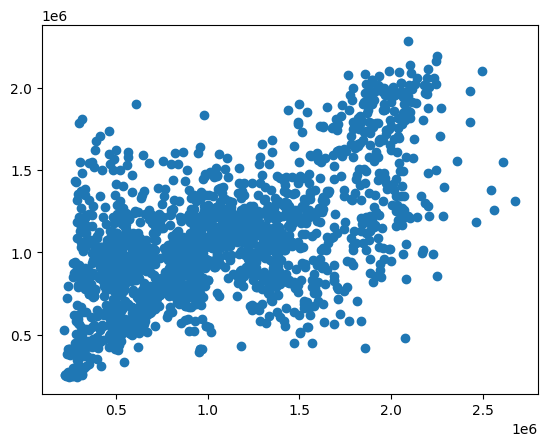

In [35]:
#KNearestNeighbors

KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred4=KNN.predict(x_test)

plt.scatter(y_test,y_pred4)
print('R2 :',r2_score(y_test,y_pred4))
print('MSE :',mean_squared_error(y_test,y_pred4))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred4)))

R2 : 0.9736815756907102
MSE : 7769368341.256682
RMSE : 88144.0204509454


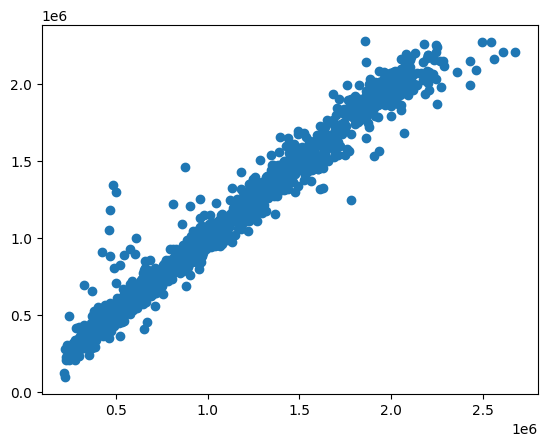

In [36]:
#XGBoost
Xgb=XGBRegressor()
Xgb.fit(x_train,y_train)
y_pred5=Xgb.predict(x_test)

plt.scatter(y_test,y_pred5)
print('R2 :',r2_score(y_test,y_pred5))
print('MSE :',mean_squared_error(y_test,y_pred5))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred5)))

In [37]:
#Feature Importance

Feature_importance=pd.DataFrame()
Feature_importance['Features']=x.columns
Feature_importance['Values']=Rf.feature_importances_

print(Feature_importance.sort_values(by='Values',ascending=True))

       Features    Values
6          Year  0.000552
1  Holiday_Flag  0.002503
7         Month  0.002898
3    Fuel_Price  0.008885
2   Temperature  0.011684
8          Week  0.024035
5  Unemployment  0.055313
4           CPI  0.174726
0         Store  0.719403


#Interpretation

To get  best fitted model we always look at the r2 score and model with minimum error so from above all the models we can see that the r2 is greater for the xgboost model and also has minimum error hence xgboost is the best fitted model for the given dataset